In [1]:
import torch
from hwdb import HWDB
from model import ConvNet
import cv2
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [2]:
d = []
index = 0
g = os.walk('data/train')
for path,dir_list,file_list in g:
    dir_list.sort()
    for dir_name in dir_list:
        d.append(dir_name)

In [3]:
batch_size = 1
lr = 0.01

In [4]:
transform = transforms.Compose([
        transforms.Resize((64, 64)),
        transforms.RandomCrop(64, padding=8),
        transforms.ToTensor(),
        transforms.Grayscale()
    ])
dataset = HWDB(path='data', transform=transform)
num_classes = dataset.num_classes
trainloader, testloader = dataset.get_loader(batch_size)

In [5]:
type(dataset.trainset[0][0])

torch.Tensor

In [6]:
net =  ConvNet(num_classes).to('cuda')
net.load_state_dict(torch.load('checkpoints/handwriting_iter_019.pth'))
net.eval()
print("net loaded...")

net loaded...


In [7]:
def imshow(img_ts):
    img_ts = img_ts / 2 + 0.5
    img_np = img_ts.numpy()
    img_np = img_np.transpose(1,2,0)
    plt.imshow(img_np)

In [8]:
def char_decode(b):
    # try:
    #     return b.decode('gb2312')
    # except:
    return b.decode('gbk')

In [9]:
def hex_to_char(predicted):
    char  = {char_decode(bytes.fromhex(d[idx])) for idx in predicted}
    # b = bytes.fromhex(c_b)
    # char = b.decode('gb2312')
    return char

In [10]:
def valid(epoch, net, test_loarder):
    print("epoch %d 开始验证..." % epoch)
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loarder:
            images, labels = images.cuda(), labels.cuda()
            net.eval()
            # print(images[0][0])
            outputs = net(images)
            imshow(torchvision.utils.make_grid(images.cpu()))
            # 取得分最高的那个类
            _, predicted = torch.max(outputs.data, 1)
            print(hex_to_char(predicted.cpu().numpy()))
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            break
        print('correct number: ', correct)
        print('totol number:', total)
        acc = 100 * correct / total
        print('第%d个epoch的识别准确率为：%d%%' % (epoch, acc))
        # writer.add_scalar('valid_acc', acc, global_step=epoch)

epoch 0 开始验证...
{'史'}
correct number:  1
totol number: 1
第0个epoch的识别准确率为：100%


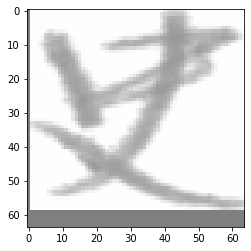

In [11]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=lr)
valid(0, net, testloader)

达


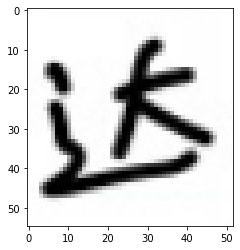

In [12]:
transform2 = transforms.Compose([
        transforms.ToTensor(),
        transforms.Resize((64, 64)),
        # transforms.RandomCrop(64, padding=8),
        transforms.Grayscale()
    ])

img = cv2.imread('da.png')
plt.imshow(img)
# plt.imshow(img)
img_ = transform2(img)
img_ = img_.unsqueeze(0).cuda()
# img = cv2.resize(img, (64, 64))
# img_ = torch.from_numpy(img).float().cuda().unsqueeze(0).unsqueeze(0)/255
# img

with torch.no_grad():
    y = net(img_)
    idx = y.argmax(1)
    c_b = d[idx]
    b = bytes.fromhex(c_b)
    char = b.decode('gb2312')
    print(char)